<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro_testes_estatisticos/intro_testes_estatisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import seaborn as sns

tmdb = pd.read_csv('https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/intro_testes_estatisticos/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [98]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Text(0.5, 1.0, 'Media de votos em filmes no "TMDB 5000"')

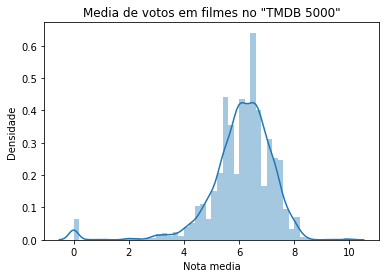

In [99]:
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='Nota media', ylabel='Densidade')
ax.set_title('Media de votos em filmes no "TMDB 5000"')

Text(0.5, 1.0, 'Media de votos em filmes no "TMDB 5000"')

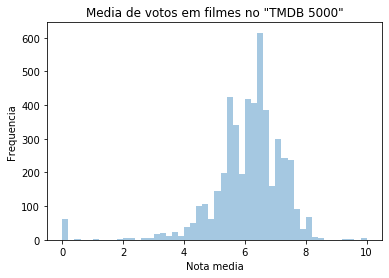

In [100]:
ax = sns.distplot(tmdb.vote_average, kde=False)
ax.set(xlabel='Nota media', ylabel='Frequencia')
ax.set_title('Media de votos em filmes no "TMDB 5000"')

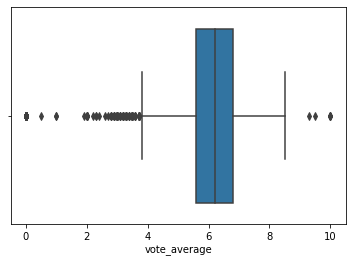

In [101]:
sns.boxplot(tmdb.vote_average)

In [102]:
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [103]:
 tmdb_com_mais_de_10_votos = tmdb.query('vote_count > 10')
 tmdb_com_mais_de_10_votos.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0.5, 1.0, 'Media de votos em filmes no TMDB 5000 dentre os filmes com mais de 10 votos')

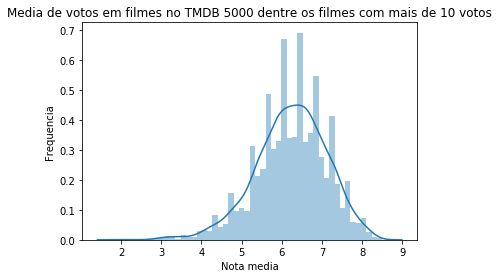

In [104]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota media', ylabel='Frequencia')
ax.set_title('Media de votos em filmes no TMDB 5000 dentre os filmes com mais de 10 votos')

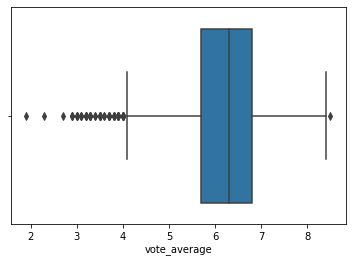

In [105]:
sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)

# Analisar os dados do MovieLens

In [106]:
notas = pd.read_csv('https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/intro_testes_estatisticos/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [107]:
# Media das notas
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Media de votos em filmes no MovieLens 100k')

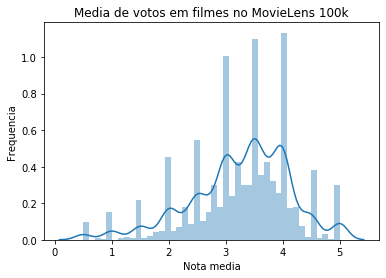

In [108]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota media', ylabel='Frequencia')
ax.set_title('Media de votos em filmes no MovieLens 100k')

In [109]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('userId >= 10').index.values
filmes_com_pelo_menos_10_votos

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [110]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Media de votos em filmes no MovieLens 100k com mais de 10 votos')

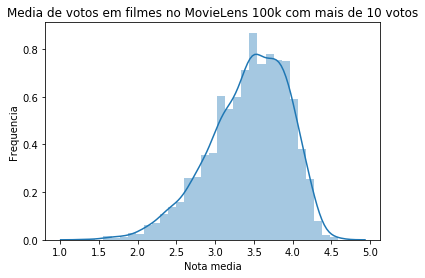

In [111]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota media', ylabel='Frequencia')
ax.set_title('Media de votos em filmes no MovieLens 100k com mais de 10 votos')

Text(0.5, 1.0, 'Distribuição da nota média dos filmes do Movielens 100k dentre os filmes com 10 ou mais votos')

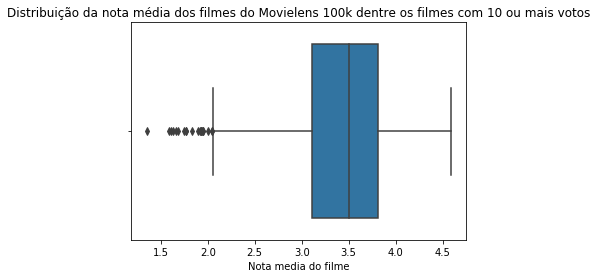

In [112]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos)
ax.set(xlabel='Nota media do filme')
ax.set_title('Distribuição da nota média dos filmes do Movielens 100k dentre os filmes com 10 ou mais votos')

# Visualizando CDF

* Cumulative Distribution Function

Text(0.5, 1.0, 'Media de votos em filmes no MovieLens 100k com mais de 10 votos')

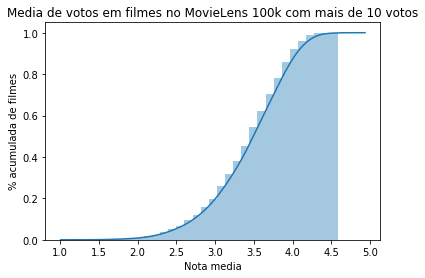

In [113]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})
ax.set(xlabel='Nota media', ylabel='% acumulada de filmes')
ax.set_title('Media de votos em filmes no MovieLens 100k com mais de 10 votos')

Text(0.5, 1.0, 'Media de votos em filmes no TNDB 5000 com mais de 10 votos')

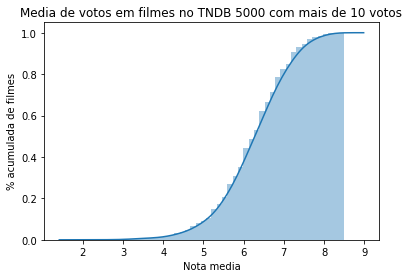

In [114]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})
ax.set(xlabel='Nota media', ylabel='% acumulada de filmes')
ax.set_title('Media de votos em filmes no TNDB 5000 com mais de 10 votos')

# Analisando a distribuição dos dados capturados de outros campos do TNDB

In [115]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0.5, 1.0, 'Numero de votos em filmes no TMDB 5000 dentre os filmes com mais de 10 votos')

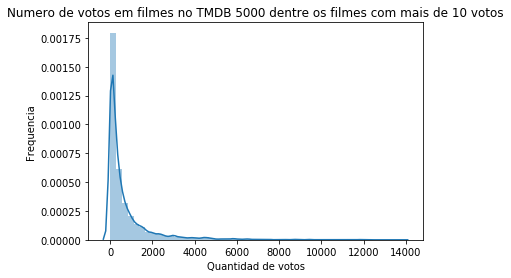

In [116]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Quantidad de votos', ylabel='Frequencia')
ax.set_title('Numero de votos em filmes no TMDB 5000 dentre os filmes com mais de 10 votos')

Text(0.5, 1.0, 'Valor gasto em filmes no TMDB 5000')

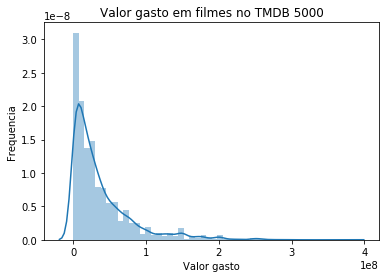

In [117]:
ax = sns.distplot(tmdb.query("budget >0").budget)
ax.set(xlabel='Valor gasto', ylabel='Frequencia')
ax.set_title('Valor gasto em filmes no TMDB 5000')

Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

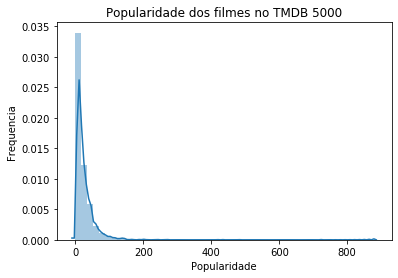

In [118]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='Frequencia')
ax.set_title('Popularidade dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Tempo de duração dos filmes no TMDB 5000')

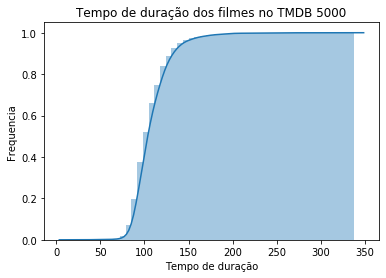

In [121]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(),
                  hist_kws={'cumulative': True},
                  kde_kws={'cumulative': True})
ax.set(xlabel='Tempo de duração', ylabel='Frequencia')
ax.set_title('Tempo de duração dos filmes no TMDB 5000')

In [122]:
tmdb.query("runtime > 0").runtime.dropna().quantile(0.8)

121.0

# Testes de uma amostra

In [128]:
nota_media_dos_filmes_com_pelo_menos_10_votos.mean()

3.4320503405352603

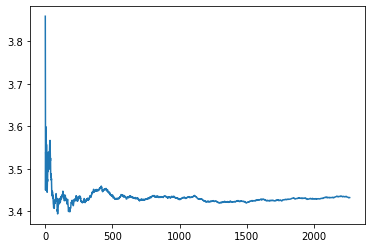

In [130]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(75243)

temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

# Media dos filmes com pelo menos 10 votos
medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

# Criando intervalo de confiança

* [statsmodels.stats.weightstats.zconfint](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.zconfint.html)

* [Difference Between T-test and Z-test](https://keydifferences.com/difference-between-t-test-and-z-test.html)

* [statsmodels.stats.weightstats.DescrStatsW.tconfint_mean](https://www.statsmodels.org/dev/generated/generated/statsmodels.stats.weightstats.DescrStatsW.tconfint_mean.html?highlight=tconfint#statsmodels.stats.weightstats.DescrStatsW.tconfint_mean)

In [132]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)


(3.4112459477469557, 3.452854733323563)

In [134]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()


(3.411234839229381, 3.4528658418411395)

# Z-test para uma amostra

In [135]:
filmes = pd.read_csv('https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/intro_testes_estatisticos/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [137]:
notas1 = notas.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas do ToyStory')

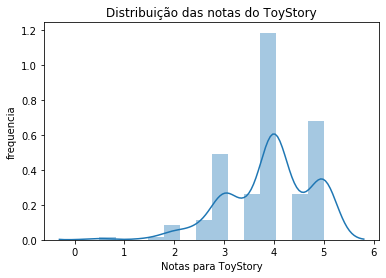

In [138]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel='Notas para ToyStory', ylabel='frequencia')
ax.set_title('Distribuição das notas do ToyStory')

Text(0.5, 1.0, 'Distribuição das notas do ToyStory')

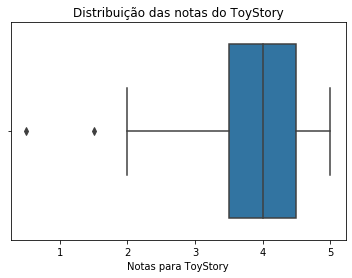

In [139]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel='Notas para ToyStory')
ax.set_title('Distribuição das notas do ToyStory')

In [140]:
notas1.rating.mean()

3.9209302325581397

In [141]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [148]:
# A média de Toy Story é igual a média de todos os filmes?

from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value=nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
# Com p-value < 0.05 é possível afirmar que as médias são diferentes para uma confiança de 95%

(8.586342305916716, 8.978190401886942e-18)

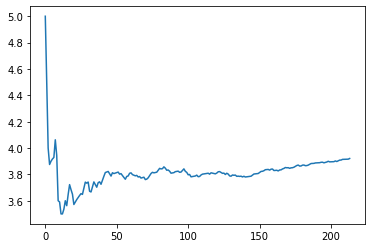

In [151]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating
medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

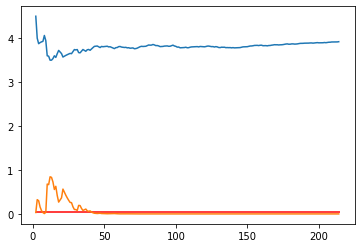

In [165]:
np.random.seed(75241)

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value=nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
  return (i, media, p)

temp = notas1.sample(frac=1).rating
valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y=0.05, xmin=2, xmax=len(temp), colors='r')

* Para conjuntos pequenos a hipotese nula não foi rejeitada, concluindo erroneamente que as medias sao iguais

* Nao há evidencias para descartar a hipotes nula ou não há amostras suficientes para descartar a hipotese nula.

In [168]:
# teste para o quao diferentes sao as duas notas (dois conjuntos de amostras)
print(zconfint(notas1.rating, notas.rating))
print(ztest(notas1.rating, notas.rating))

(0.2799245129192442, 0.5588219849631111)
(5.894327101501841, 3.762112778881965e-09)


In [169]:
from scipy.stats import ttest_ind

ttest_ind(notas1.rating, notas.rating)


Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [174]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1.rating)
comparacao = descr_toy_story.get_compare(descr_todas_as_notas)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.4194,0.071,5.894,0.000,0.280,0.559


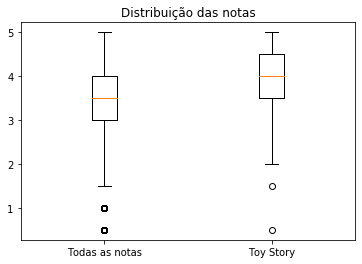

In [177]:
plt.boxplot([notas.rating, notas1.rating], labels=['Todas as notas', 'Toy Story'])
plt.title('Distribuição das notas')
plt.show()

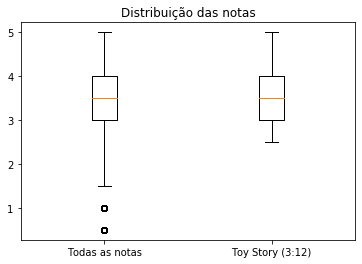

In [179]:
# Cuidado com dados insuficientes
plt.boxplot([notas.rating, notas1[3:12].rating], labels=['Todas as notas', 'Toy Story (3:12)'])
plt.title('Distribuição das notas')
plt.show()

In [180]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1[3:12].rating)
comparacao = descr_toy_story.get_compare(descr_todas_as_notas)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0540,0.348,0.155,0.877,-0.627,0.735


* Não teriamos descartado a hipotese nula que as medias sao iguais;
* Intervalo de confiança nao da pra afirmar;
* Nao temos evidencias contra a hipotese nula entao as medias sao iguais ou nao se tem dados suficientes.

# Comparar mais 2 filmes


In [181]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


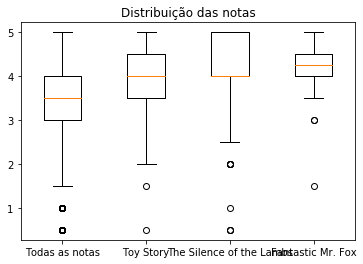

In [182]:
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

plt.boxplot([notas.rating, notas1.rating, notas593.rating, notas72226.rating],
            labels=['Todas as notas', 'Toy Story', 'The Silence of the Lambs', 'Fantastic Mr. Fox'])
plt.title('Distribuição das notas')
plt.show()

In [184]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


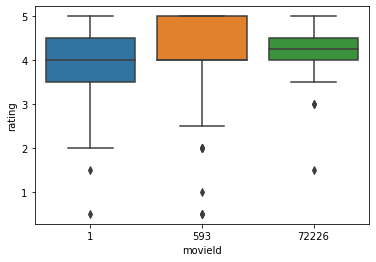

In [185]:
sns.boxplot(x='movieId', y='rating', data=notas.query('movieId in (1, 593, 72226)'))

In [186]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


* Encontramos uma diferença estatística pelo z-test com um p-value de 0.002 e intervalo de confiança entre -0.391 e -0.09 para uma confiança de 95%

In [190]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


* Não encontramos uma diferença estatística pelo z-test com um p-value > 0.05 e intervalo de confiança entre negativo e positivo (sem valor informativo) para uma confiança de 95%

In [191]:
comparacao = descr_72226.get_compare(descr_1)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1624,0.206,0.788,0.431,-0.243,0.568


* Não encontramos uma diferença estatística pelo z-test com um p-value > 0.05 e intervalo de confiança entre negativo e positivo (sem valor informativo) para uma confiança de 95%

In [189]:
# Tamanho das amostras
notas.query('movieId in (1, 593, 72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


* Para o filme 72226 com pequena amostra deveriamos rodar o t-test

# Testes não-paramétricos

In [193]:
# Garantir que os dados vêm de uma normal
from scipy.stats import normaltest

_, p = normaltest(notas1.rating)
print(p)

18.220369223286593 0.00011053430732728716


* Com um pvalue < 0.05 descarta-se a hipotese nula de que os dados são normais;
* Assim, deve se aplicar testes não-parametricos, inves de t, z-test (parametricos).

In [194]:
# ranksums, computa Wilcoxon rank soma para duas amostras
from scipy.stats import ranksums

_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693

* Para um pvalue < 0.05 descarta-se a hipotese nula de que as duas amostras vieram da mesma distribuição. Ou seja, os valores de uma amostra tendem a ser maiores do que o da outra amostra (sem falar de media).